<a href="https://colab.research.google.com/github/atharva0300/Learn-Cuda/blob/main/learn_cuda_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
pip install nvcc4jupyter

In [55]:
%load_ext nvcc4jupyter

The nvcc4jupyter extension is already loaded. To reload it, use:
  %reload_ext nvcc4jupyter


In [56]:
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-7 60 --slave /usr/bin/g++ g++ /usr/bin/g++-7


update-alternatives: error: alternative path /usr/bin/gcc-7 doesn't exist


In [57]:
!gcc --version


gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [58]:
%%cuda
#include<bits/stdc++.h>
using namespace std;

int main(){
    cout<<"This is atharva\n";
}

This is atharva



In [59]:
%%cuda
#include<bits/stdc++.h>
#include<cuda.h>
using namespace std;

// compiler used here is : nvcc

// __global__ tells that the function dbkernel() will be run on a gpu and not a cpu
// return type is void
// this gets executed in the device. This is the device code
// the function name dbkernel() can be changed to any other function name
__global__ void dbkernel(){
    printf("This is Atharva\n");
    // std::cout statement is not allowed in device code
    // ptintf() statement is used instead
    // the cpu and the gpu is executing asynchronously
}


// this is the host code
// this code ( int main() ) function runs on the host device
int main(){
    // dbkernel() name of the function ( kernel launch )
    // the <<<1,1,>>> means launching the kernel with 1x1 thread
    dbkernel<<<1 , 1>>>();

    // wait for the deivce operations to finish and then come back to the host
    // for synchronous computation
    cudaDeviceSynchronize();
    // with this we can see the output of the dbkernel() function as the host and the device will run synchronously
    // without this statement, the output statement may nor may not be displayed because the device and the
    // host machines are running asynchronously.
    // this cudaDeviceSynchronize() function waits for the device code to finish
    // cpu kernel and the gpu run's asynchronously
    return 0;
}

This is Atharva



In [60]:
%%cuda
#include<bits/stdc++.h>
#include<cuda.h>
using namespace std;

__global__ void dbkernel(){
    printf("This is Atharva\n");
}


// this is the host code
// this code ( int main() ) function runs on the host device
int main(){
    dbkernel<<<1 , 1>>>();
    dbkernel<<<1 , 1>>>();
    dbkernel<<<1 , 1>>>();
    cudaDeviceSynchronize();
    printf("on cpu\n");
    return 0;
}

This is Atharva
This is Atharva
This is Atharva
on cpu



In [61]:
%%cuda
#include<bits/stdc++.h>
#include<cuda.h>
using namespace std;

__global__ void dbkernel(){
    printf("This is Atharva\n");
}


// this is the host code
// this code ( int main() ) function runs on the host device
int main(){
    dbkernel<<<1 , 1>>>();

    cudaDeviceSynchronize();
    printf("on cpu\n");

    dbkernel<<<1 , 1>>>();
    dbkernel<<<1 , 1>>>();
    return 0;
}

This is Atharva
on cpu



In [62]:
%%cuda
#include<bits/stdc++.h>
#include<cuda.h>
using namespace std;

__global__ void dbkernel(){
    printf("This is Atharva\n");
}


// this is the host code
// this code ( int main() ) function runs on the host device
int main(){
    dbkernel<<<1 , 1>>>();

    cudaDeviceSynchronize();

    dbkernel<<<1 , 1>>>();
    dbkernel<<<1 , 1>>>();

    printf("on cpu\n");
    return 0;
}

This is Atharva
on cpu



In [63]:
%%cuda
#include<bits/stdc++.h>
#include<cuda.h>
using namespace std;

__global__ void dbkernel(){
    printf("This is Atharva\n");
}

__global__ void dbkernel2(){
    printf("This is Atharva 2\n");
}

// this is the host code
// this code ( int main() ) function runs on the host device
int main(){
    dbkernel<<<1 , 1>>>();
    dbkernel2<<<1 , 1>>>();

    cudaDeviceSynchronize();

    printf("on cpu\n");
    return 0;
}

This is Atharva
This is Atharva 2
on cpu



In [64]:
%%cuda
#include<bits/stdc++.h>
#include<cuda.h>
using namespace std;

__global__ void dbkernel(){
    printf("This is Atharva\n");
}


// this is the host code
// this code ( int main() ) function runs on the host device
int main(){
    dbkernel<<<1 , 1>>>();
    printf("cpu one\n");

    dbkernel<<<1 , 1>>>();
    printf("cpu two\n");

    dbkernel<<<1 , 1>>>();
    printf("cpu three\n");

    cudaDeviceSynchronize();

    printf("on cpu\n");
    return 0;
}

cpu one
cpu two
cpu three
This is Atharva
This is Atharva
This is Atharva
on cpu



In [65]:
%%cuda
#include<bits/stdc++.h>
#include<cuda.h>
using namespace std;

__global__ void dbkernel(){
    printf("This is Atharva\n");
}


// this is the host code
// this code ( int main() ) function runs on the host device
int main(){
    // using multiple threads
    // 1 -> denoting the number of blocks
    // 32 -> denoting the number of threads in the block
    // therefore -> 1x32 => 32 threads in total
    dbkernel<<<1 , 32>>>();
    cudaDeviceSynchronize();
    printf("on cpu\n");
    return 0;
}

This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
This is Atharva
on cpu



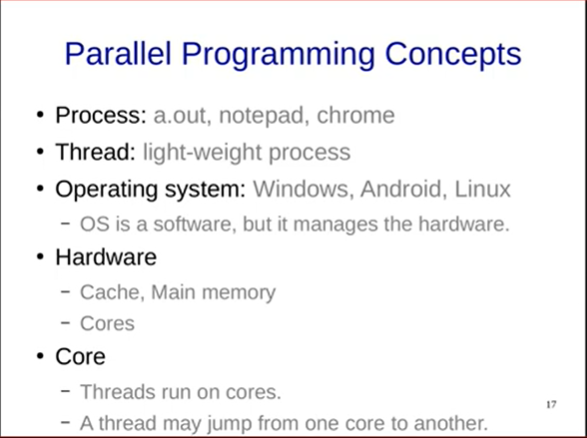

In [66]:
%%cuda
#include<bits/stdc++.h>
#include<cuda.h>
using namespace std;

#define N 100

int main(){
    int i;
    for(i=0;i<N;i++){
        printf("%d\n" , i*i);
    }
    return 0;
}


0
1
4
9
16
25
36
49
64
81
100
121
144
169
196
225
256
289
324
361
400
441
484
529
576
625
676
729
784
841
900
961
1024
1089
1156
1225
1296
1369
1444
1521
1600
1681
1764
1849
1936
2025
2116
2209
2304
2401
2500
2601
2704
2809
2916
3025
3136
3249
3364
3481
3600
3721
3844
3969
4096
4225
4356
4489
4624
4761
4900
5041
5184
5329
5476
5625
5776
5929
6084
6241
6400
6561
6724
6889
7056
7225
7396
7569
7744
7921
8100
8281
8464
8649
8836
9025
9216
9409
9604
9801



In [67]:
%%cuda
// making the above code execute parallely
#include<bits/stdc++.h>
#include<cuda.h>
using namespace std;

#define N 100

__global__ void fun(){
    printf("%d\n" , threadIdx.x * threadIdx.x);
    // computation is done in jumbled order so the output will be printed in jumbled order
    // threadIdx means the thread
    // the threadIdx.x value is the thread number
    // note that there is no loop here
}

int main(){
    // 1 block and N threads
    // our N is 100, so 100 threads
    fun<<<1 , N>>>();
    cudaDeviceSynchronize();
    return 0;
}

9216
9409
9604
9801
0
1
4
9
16
25
36
49
64
81
100
121
144
169
196
225
256
289
324
361
400
441
484
529
576
625
676
729
784
841
900
961
1024
1089
1156
1225
1296
1369
1444
1521
1600
1681
1764
1849
1936
2025
2116
2209
2304
2401
2500
2601
2704
2809
2916
3025
3136
3249
3364
3481
3600
3721
3844
3969
4096
4225
4356
4489
4624
4761
4900
5041
5184
5329
5476
5625
5776
5929
6084
6241
6400
6561
6724
6889
7056
7225
7396
7569
7744
7921
8100
8281
8464
8649
8836
9025

